In [11]:
import pandas as pd

df=pd.read_csv('..\\Data\\fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [12]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


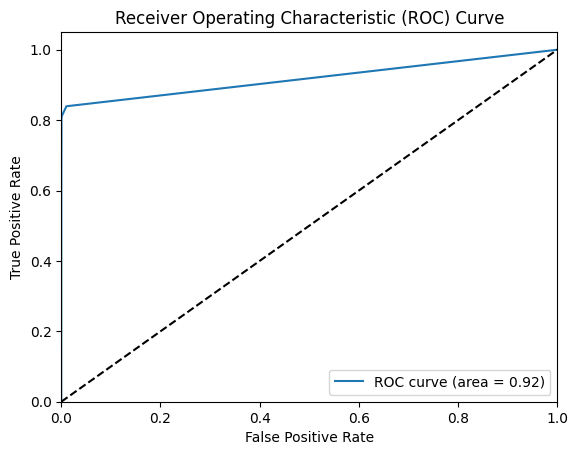

In [15]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [16]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [17]:
## print("Train-Test Split (70% Train, 30% Test)")
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y,
                                                              test_size=0.30,
                                                              random_state=1)

# Train and evaluate model with 70/30 split
steps_70_30 = [('scaler', StandardScaler()),
               ('knn', KNeighborsClassifier(n_neighbors=5))] # Using default k=5 for this split

knn_pipeline_70_30 = Pipeline(steps_70_30)
knn_pipeline_70_30.fit(X_train_70, y_train_70)

ypred_test_30 = knn_pipeline_70_30.predict(X_test_30)
mat_clf_30 = confusion_matrix(y_test_30, ypred_test_30)
report_clf_30 = classification_report(y_test_30, ypred_test_30)

print("\n--- Model Performance with 70/30 Split (K=5) ---")
print(mat_clf_30)
print(report_clf_30)


--- Model Performance with 70/30 Split (K=5) ---
[[6398    3]
 [  22   85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508



In [18]:
k_values = range(1, 21)
performance_metrics = []

for k in k_values:
    knn_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    knn_pipeline.fit(X_train, y_train)

    ypred_test = knn_pipeline.predict(X_test)
    report = classification_report(y_test, ypred_test, output_dict=True)
    
    # Get probabilities for AUC calculation
    ypred_test_proba = knn_pipeline.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, ypred_test_proba[:, 1])

    # Store the relevant metrics
    performance_metrics.append({
        'K_Value': k,
        'Accuracy': report['accuracy'],
        'Precision_Class1': report['1']['precision'],
        'Recall_Class1': report['1']['recall'],
        'F1_Score_Class1': report['1']['f1-score'],
        'AUC_Score': auc_score
    })

results_df = pd.DataFrame(performance_metrics).round(3)
print(results_df)

# Find the K value that maximizes the F1-Score for Class 1
best_k_f1 = results_df.loc[results_df['F1_Score_Class1'].idxmax()]
print("F1-Score:\n",best_k_f1)

# Find the K value that maximizes the AUC Score
best_k_auc = results_df.loc[results_df['AUC_Score'].idxmax()]
print("AUC_Score:\n",best_k_auc)

    K_Value  Accuracy  Precision_Class1  Recall_Class1  F1_Score_Class1  \
0         1     0.995             0.836          0.818            0.827   
1         2     0.996             0.973          0.781            0.866   
2         3     0.996             0.973          0.796            0.876   
3         4     0.996             0.973          0.796            0.876   
4         5     0.996             0.973          0.796            0.876   
5         6     0.996             0.972          0.774            0.862   
6         7     0.996             0.973          0.788            0.871   
7         8     0.996             0.972          0.759            0.852   
8         9     0.996             0.972          0.766            0.857   
9        10     0.996             0.972          0.766            0.857   
10       11     0.996             0.972          0.766            0.857   
11       12     0.996             0.972          0.752            0.848   
12       13     0.996    

In [19]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0
